Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

Model Training

In [2]:
data = pd.read_csv('bird dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
birds_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(birds_list)#Scaling the Feature columns
X = data.iloc[:, :-1]
pca1=PCA(n_components=17)
pca1.fit(X)
X_pca=pca1.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

Normalizing the data for improving the accuracy

In [3]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Model Fitting and Evaluating

In [4]:
print('fitting...')
clf = SVC(kernel='linear',random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc=acc*100
print("Accuracy=%0.3f" % acc)


fitting...
Accuracy=62.903


Printing the Confusion Matrix

Confusion Matrix:


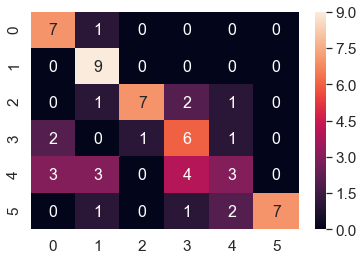

In [7]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)

import seaborn as sn
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(6), range(6))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()